# Mobile Phones Prices Classification - Ensemble Methods

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/07. Youtube/05. Guided Project Ensemble Methods Mobile Prices/mobile_train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Distributions

In [ ]:
for feat in df.columns:
  sns.displot(df, x=feat, hue='price_range')
  plt.title(feat)
  plt.show()

**Observations**

+ **battery_power- uniform distribution with mild relationship with target**
+ **blue- category, very weak relationship with target**
+ clock_speed-semi- uniform distribution, candidate for binning 
+ **dual_sim- category very weak relation with target**
+ fc- mild exponential distribution
+ ***four_g- category, slight relationship with target classes 2 and 3***
+ int_memory- uniform distribution
+ m_dep- uniform distribution
+ mobile_wt- uniform distribution
+ n_cores- uniform distribution
+ pc- uniform distribution
+ px_height- weak exponential distribution
+ px_width- uniform distribution mild relationship with target
+ ***ram- strong relation with target***
+ sc_h- semi-uniform distribution
+ sc_w- very weak expontntial distribution 
+ talk_time- semi-uniform distribution
+ g_three- imbalanced category
+ touch_screen- balanced cateogry
+ wifi- balanced category
+ **price_range- target with balanced classes**

## Bivariate Analysis

In [ ]:
sns.pairplot(df, hue='price_range', palette ='crest')

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Correlation Matrix Cell Phone Specs')

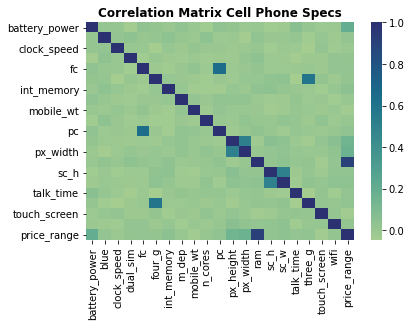

In [ ]:
sns.heatmap(df.corr(), cmap='crest')
plt.title('Correlation Matrix Cell Phone Specs', fontweight='bold')

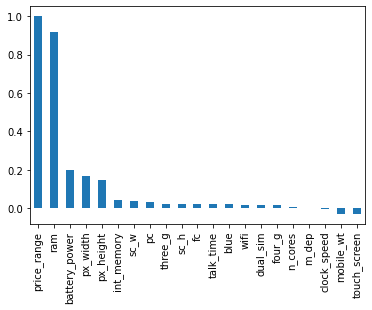

In [ ]:
df.corrwith(df['price_range']).sort_values(ascending =False).plot(kind='bar')

**Observations**

+ 

# preprocessing

## log transform

### fc

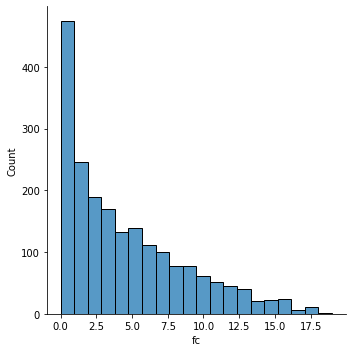

In [ ]:
sns.displot(df['fc'])

In [ ]:
df['fc_log'] = np.log(df['fc']+1.1)

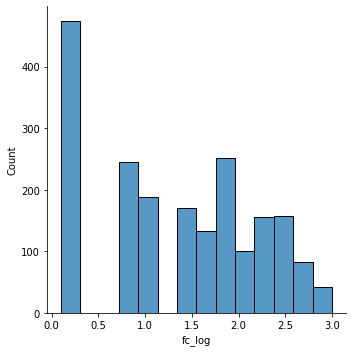

In [ ]:
sns.displot(df['fc_log'])

In [ ]:
df['fc_log'].value_counts()

0.095310    474
0.741937    245
1.131402    189
1.410987    170
1.808289    139
1.629241    133
1.960095    112
2.091864    100
2.312535     78
2.208274     77
2.406945     62
2.493205     51
2.572612     45
2.646175     40
2.839078     24
2.778819     23
2.714695     20
2.949688     11
2.895912      6
3.000720      1
Name: fc_log, dtype: int64

### px_height

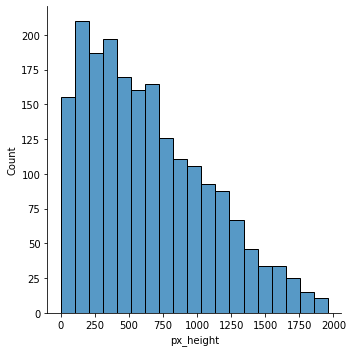

In [ ]:
sns.displot(df['px_height'])

In [ ]:
df['px_height_log'] = np.log(df['px_height']+1)

In [ ]:
df['px_height_log'].describe()

count    2000.000000
mean        6.128078
std         0.999091
min         0.000000
25%         5.648092
50%         6.336826
75%         6.854618
max         7.581210
Name: px_height_log, dtype: float64

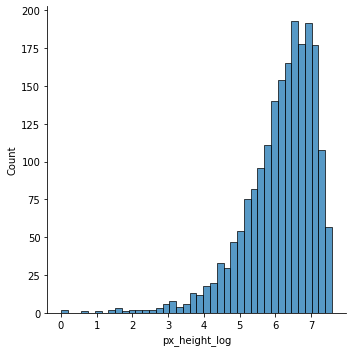

In [ ]:
sns.displot(df['px_height_log'])

### sc_w

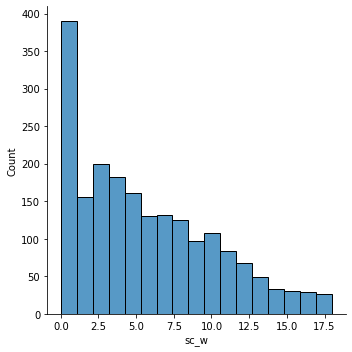

In [ ]:
sns.displot(df.sc_w)

In [ ]:
df.sc_w_log = np.log(df.sc_w+1.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


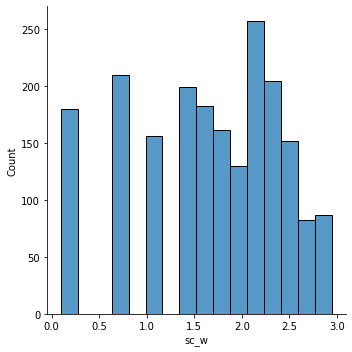

In [ ]:
sns.displot(df.sc_w_log)

## Binning

In [ ]:
features_bin = ['battery_power', 'clock_speed','int_memory','m_dep','mobile_wt',
            'n_cores','pc','px_width', 'ram', 'sc_h', 'talk_time']

In [ ]:
for feat in features_bin:
  df[f'{feat}_bin'] = pd.cut(df[feat], bins=df[feat].quantile(np.linspace(0,1,5)), labels=['a','b','c','d'])

In [ ]:
for feat in features_bin:
  print(df[f'{feat}_bin'].value_counts())

b    500
c    500
d    500
a    498
Name: battery_power_bin, dtype: int64
d    495
b    489
c    465
a    138
Name: clock_speed_bin, dtype: int64
b    500
c    493
a    484
d    481
Name: int_memory_bin, dtype: int64
c    594
b    572
d    301
a    213
Name: m_dep_bin, dtype: int64
b    506
d    496
c    489
a    488
Name: mobile_wt_bin, dtype: int64
c    735
a    493
b    274
d    256
Name: n_cores_bin, dtype: int64
b    537
d    462
a    450
c    450
Name: pc_bin, dtype: int64
b    502
c    500
a    498
d    498
Name: px_width_bin, dtype: int64
b    500
c    500
d    500
a    499
Name: ram_bin, dtype: int64
c    552
a    506
d    437
b    408
Name: sc_h_bin, dtype: int64
b    536
c    531
a    421
d    413
Name: talk_time_bin, dtype: int64


## get_dummies

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'fc_log', 'px_height_log',
       'battery_power_bin', 'clock_speed_bin', 'int_memory_bin', 'm_dep_bin',
       'mobile_wt_bin', 'n_cores_bin', 'pc_bin', 'px_width_bin', 'ram_bin',
       'sc_h_bin', 'talk_time_bin'],
      dtype='object')

In [ ]:
features_cat = ['battery_power_bin', 'clock_speed_bin', 'int_memory_bin', 'm_dep_bin',
       'mobile_wt_bin', 'n_cores_bin', 'pc_bin', 'px_width_bin', 'ram_bin',
       'sc_h_bin', 'talk_time_bin', 'three_g','touch_screen','wifi','dual_sim']

In [ ]:
df = pd.get_dummies(df, columns=features_cat)

In [ ]:
df.shape

(2000, 71)

# Modeling

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'fc', 'four_g', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'price_range', 'fc_log', 'px_height_log',
       'battery_power_bin_a', 'battery_power_bin_b', 'battery_power_bin_c',
       'battery_power_bin_d', 'clock_speed_bin_a', 'clock_speed_bin_b',
       'clock_speed_bin_c', 'clock_speed_bin_d', 'int_memory_bin_a',
       'int_memory_bin_b', 'int_memory_bin_c', 'int_memory_bin_d',
       'm_dep_bin_a', 'm_dep_bin_b', 'm_dep_bin_c', 'm_dep_bin_d',
       'mobile_wt_bin_a', 'mobile_wt_bin_b', 'mobile_wt_bin_c',
       'mobile_wt_bin_d', 'n_cores_bin_a', 'n_cores_bin_b', 'n_cores_bin_c',
       'n_cores_bin_d', 'pc_bin_a', 'pc_bin_b', 'pc_bin_c', 'pc_bin_d',
       'px_width_bin_a', 'px_width_bin_b', 'px_width_bin_c', 'px_width_bin_d',
       'ram_bin_a', 'ram_bin_b', 'ram_bin_c', 'ram_bin_d', 'sc_h_bin_a',
       'sc_h_bin_b', 'sc_h_bin_c', 'sc_h_bin_d', 't

In [ ]:
features = ['blue', 'fc', 'four_g',
       'm_dep', 'pc', 'px_height', 'px_width', 'ram',
       'sc_w','fc_log', 'px_height_log',
       'battery_power_bin_a', 'battery_power_bin_b', 'battery_power_bin_c',
       'battery_power_bin_d', 'clock_speed_bin_a', 'clock_speed_bin_b',
       'clock_speed_bin_c', 'clock_speed_bin_d', 'int_memory_bin_a',
       'int_memory_bin_b', 'int_memory_bin_c', 'int_memory_bin_d',
       'm_dep_bin_a', 'm_dep_bin_b', 'm_dep_bin_c', 'm_dep_bin_d',
       'mobile_wt_bin_a', 'mobile_wt_bin_b', 'mobile_wt_bin_c',
       'mobile_wt_bin_d', 'n_cores_bin_a', 'n_cores_bin_b', 'n_cores_bin_c',
       'n_cores_bin_d', 'pc_bin_a', 'pc_bin_b', 'pc_bin_c', 'pc_bin_d',
       'px_width_bin_a', 'px_width_bin_b', 'px_width_bin_c', 'px_width_bin_d',
       'ram_bin_a', 'ram_bin_b', 'ram_bin_c', 'ram_bin_d', 'sc_h_bin_a',
       'sc_h_bin_b', 'sc_h_bin_c', 'sc_h_bin_d', 'talk_time_bin_a',
       'talk_time_bin_b', 'talk_time_bin_c', 'talk_time_bin_d', 'three_g_0',
       'three_g_1', 'touch_screen_0', 'touch_screen_1', 'wifi_0', 'wifi_1',
       'dual_sim_0', 'dual_sim_1']
target =['price_range']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

# Standardize

In [ ]:
std_scaler =StandardScaler().fit(X_train)

In [ ]:
X_train = std_scaler.transform(X_train)
X_test  =std_scaler.transform(X_test)

# Modeling

## def model scorer

In [ ]:
def model_scorer(model):
  model.fit(X_train, y_train)
  score_train = model.score(X_train,  y_train)
  score_test = model.score(X_test, y_test)

  return model, score_train, score_test

## Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=4, min_samples_leaf=5, max_samples=.8)
rf, score_train_rf, score_test_rf = model_scorer(rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# BaggingClassifier

In [ ]:
bag = BaggingClassifier(max_samples=.7, max_features=.7, bootstrap_features=True)
bag, score_train_bag, score_test_bag = model_scorer(bag)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Adaboost

In [ ]:
abc = AdaBoostClassifier(n_estimators = 100, learning_rate=.001)
abc, score_train_abc, score_test_abc = model_scorer(abc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gradientboosting

In [ ]:
gbc = GradientBoostingClassifier(subsample=.7, min_samples_split=5, max_depth=5)
gbc, score_train_gbc, score_test_gbc = model_scorer(abc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Summary

In [ ]:
scores_train = [score_train_rf, score_train_bag, score_train_abc, score_train_gbc]
scores_test = [score_test_rf, score_test_bag, score_test_abc, score_test_gbc]
model_name = ['Random_Forest', 'Bagging', 'AdaBoost', 'GradientBoost']
dict_score = {
    'score_train':scores_train,
    'score_test':scores_test
}
df_score = pd.DataFrame(dict_score, index=model_name)
df_score

,score_train,score_test
Random_Forest,0.775714,0.758333
Bagging,0.980714,0.813333
AdaBoost,0.495714,0.510000
GradientBoost,0.495714,0.510000
